<a href="https://colab.research.google.com/github/kaggle-challenge-group/machine_learning_model/blob/main/kaggle_machine_lrnmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Standard library imports
import numpy as np
import pandas as pd

# imports for machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer  # Enables experimental features
from sklearn.impute import IterativeImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# imports for deep learning
import tensorflow as tf
from tensorflow.keras import layers, models

# Google Colab import loading the files
from google.colab import drive


In [2]:
# Mounting google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the train & test dataset
train = pd.read_csv('/content/drive/MyDrive/train.csv')
test = pd.read_csv('/content/drive/MyDrive/test.csv')

In [4]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


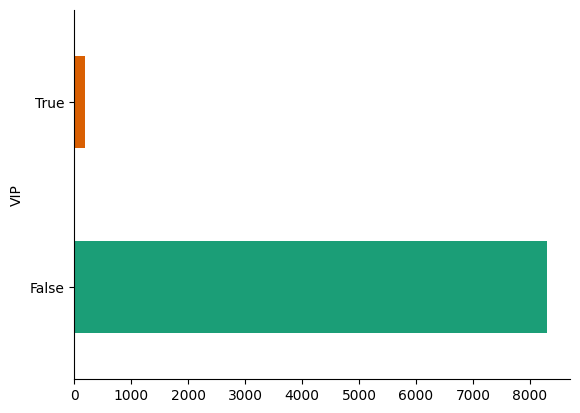

In [5]:
# @title VIP

from matplotlib import pyplot as plt
import seaborn as sns
train.groupby('VIP').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

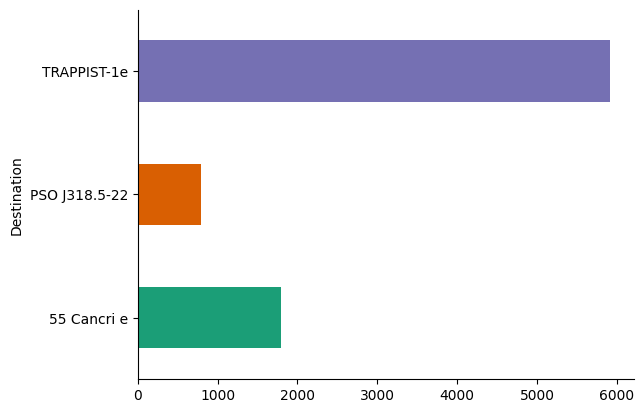

In [6]:
# @title Destination

from matplotlib import pyplot as plt
import seaborn as sns
train.groupby('Destination').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

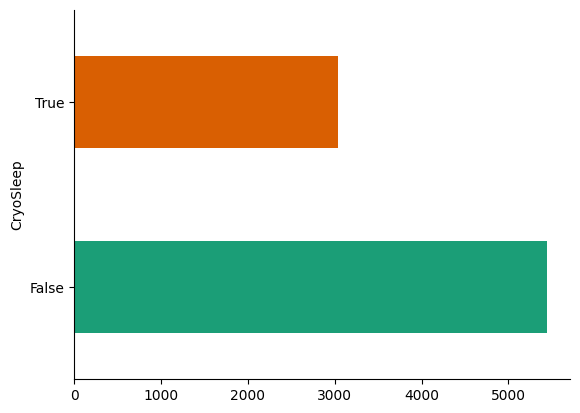

In [7]:
# @title CryoSleep

from matplotlib import pyplot as plt
import seaborn as sns
train.groupby('CryoSleep').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

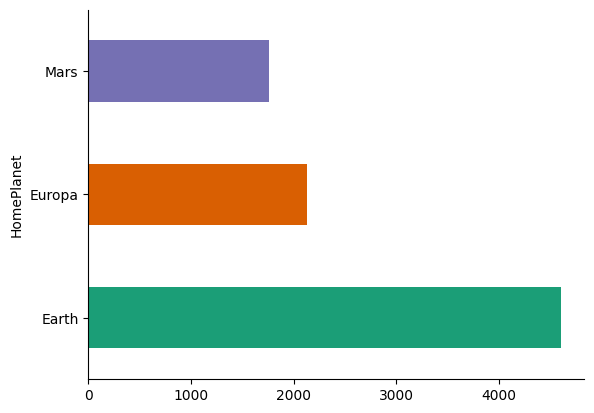

In [8]:
# @title HomePlanet

from matplotlib import pyplot as plt
import seaborn as sns
train.groupby('HomePlanet').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [9]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [12]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [13]:
test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [14]:
print(train.isnull().sum())

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


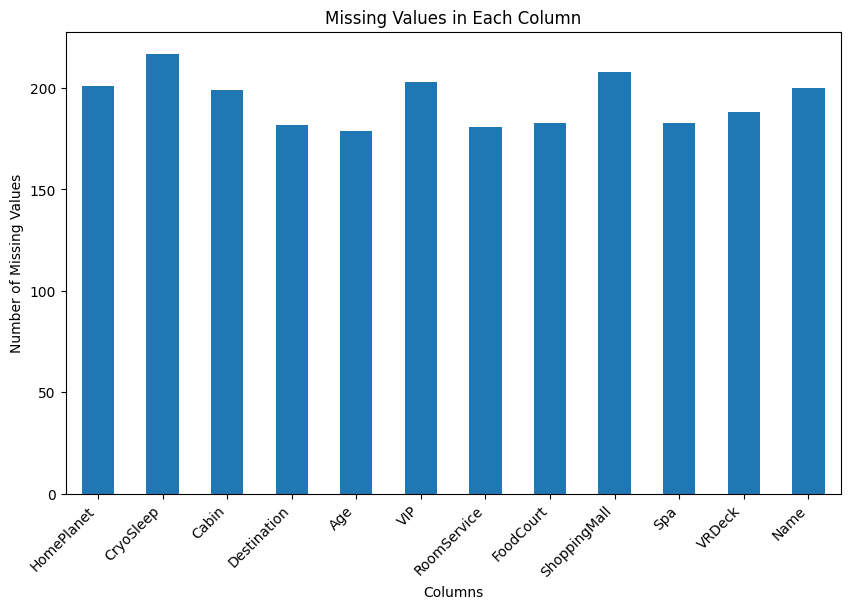

In [15]:
missing_values = train.isnull().sum()
missing_values = missing_values[missing_values > 0]
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar')
plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45, ha="right")
plt.show()


In [16]:
print(test.isnull().sum())

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


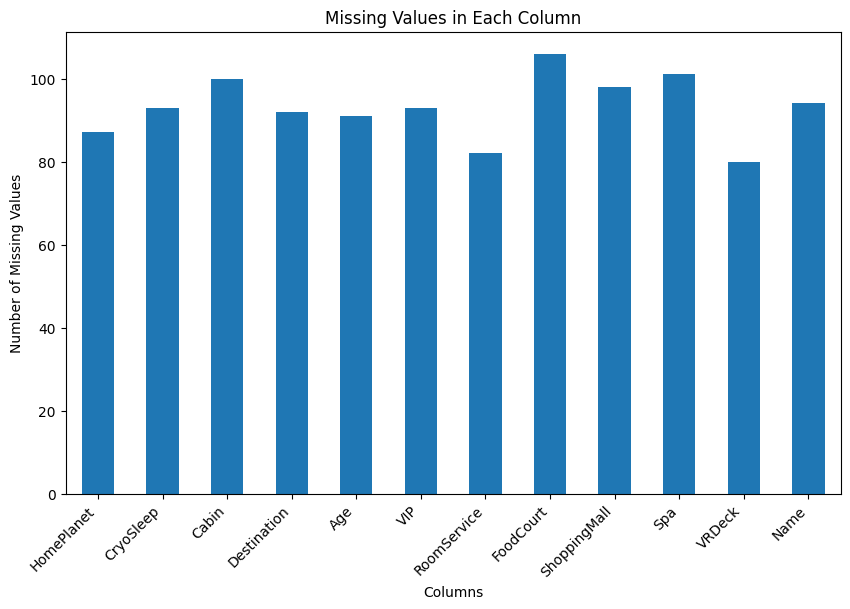

In [17]:
missing_values = test.isnull().sum()
missing_values = missing_values[missing_values > 0]
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar')
plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45, ha="right")
plt.show()

In [18]:
null_percentage = (train.isnull().sum() / len(train)) * 100
print(null_percentage)

PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64


In [19]:
null_percentage = (test.isnull().sum() / len(test)) * 100
print(null_percentage)

PassengerId     0.000000
HomePlanet      2.034136
CryoSleep       2.174421
Cabin           2.338087
Destination     2.151040
Age             2.127660
VIP             2.174421
RoomService     1.917232
FoodCourt       2.478373
ShoppingMall    2.291326
Spa             2.361468
VRDeck          1.870470
Name            2.197802
dtype: float64


In [20]:
rows_with_null = train.isnull().any(axis=1).sum()
print(f'Number of rows containing at least one null value: {rows_with_null}')
null_percentage = rows_with_null / len(train) * 100
print(null_percentage)

Number of rows containing at least one null value: 2087
24.007822385827676


In [21]:
rows_with_null = test.isnull().any(axis=1).sum()
print(f'Number of rows containing at least one null value: {rows_with_null}')
null_percentage = rows_with_null / len(test) * 100
print(null_percentage)

Number of rows containing at least one null value: 996
23.287350946925415


In [22]:
def analyze_group_consistency(df, id_col='PassengerId', columns_to_analyze=None):
    """
    Analyzes the consistency of values within groups derived from the ID column.

    Parameters:
    - df: DataFrame containing the data.
    - id_col: String, the name of the column containing identifiers to split into groups.
    - columns_to_analyze: List of strings, names of the columns to analyze for consistency within each group.
    """

    # Split 'id_col' into 'Group' and 'Member', assuming the format 'Group_Member'
    # The second part of the split is discarded with '_'
    df[['Group', '_']] = df[id_col].str.split('_', expand=True)

    # Define a function to check if all values in a column of a group are the same
    def all_same(group, column):
        """Returns True if all values in the column for the given group are the same."""
        return group[column].nunique() == 1

    # Group the dataframe by the new 'Group' column
    groups = df.groupby('Group')
    total_groups = groups.ngroups  # The total number of unique groups

    # Iterate over the specified columns to analyze
    for column in columns_to_analyze:
        # Count how many groups have the same value for the current column
        same_value_count = sum(all_same(group, column) for _, group in groups)
        # Calculate the percentage of groups with consistent values in the current column
        same_value_pct = same_value_count / total_groups * 100
        # Print the result
        print(f"Percentage of groups with the same {column}: {same_value_pct:.2f}%")


columns_to_analyze = ['HomePlanet', 'Destination', 'Cabin']
analyze_group_consistency(train, id_col='PassengerId', columns_to_analyze=columns_to_analyze)
analyze_group_consistency(test, id_col='PassengerId', columns_to_analyze=columns_to_analyze)


Percentage of groups with the same HomePlanet: 98.23%
Percentage of groups with the same Destination: 86.81%
Percentage of groups with the same Cabin: 91.64%
Percentage of groups with the same HomePlanet: 98.50%
Percentage of groups with the same Destination: 86.81%
Percentage of groups with the same Cabin: 89.75%


In [23]:
def fill_missing_with_group_data(df, columns):
    """
    Fills missing values in specified columns based on the most common value within each group.

    Parameters:
    - df: DataFrame containing the data.
    - columns: List of column names to fill missing values for.
    """
    # Group by 'Group' and then apply the filling logic
    for column in columns:
        # Use transform to apply a function while keeping the original DataFrame index
        df[column] = df.groupby('Group')[column].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)

    return df

# Columns to fill missing values for
columns_to_fill = ['HomePlanet', 'Destination', 'Cabin']

# Apply the function to fill missing values based on group data
test = fill_missing_with_group_data(test, columns_to_fill)
train = fill_missing_with_group_data(train, columns_to_fill)
# Check if there are still missing values
print(train[columns_to_fill].isnull().sum())
print(test[columns_to_fill].isnull().sum())


HomePlanet     111
Destination    103
Cabin           99
dtype: int64
HomePlanet     46
Destination    51
Cabin          63
dtype: int64


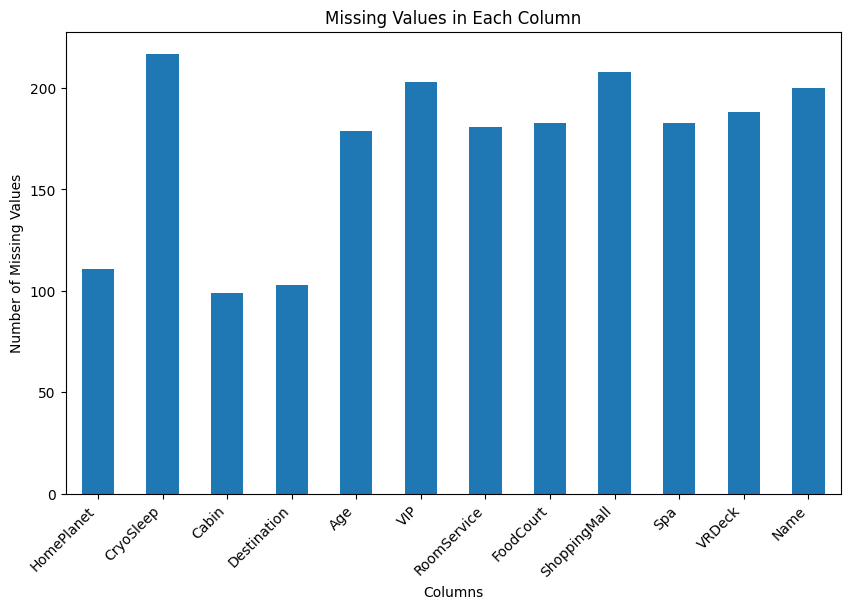

In [24]:
missing_values = train.isnull().sum()
missing_values = missing_values[missing_values > 0]
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar')
plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45, ha="right")
plt.show()

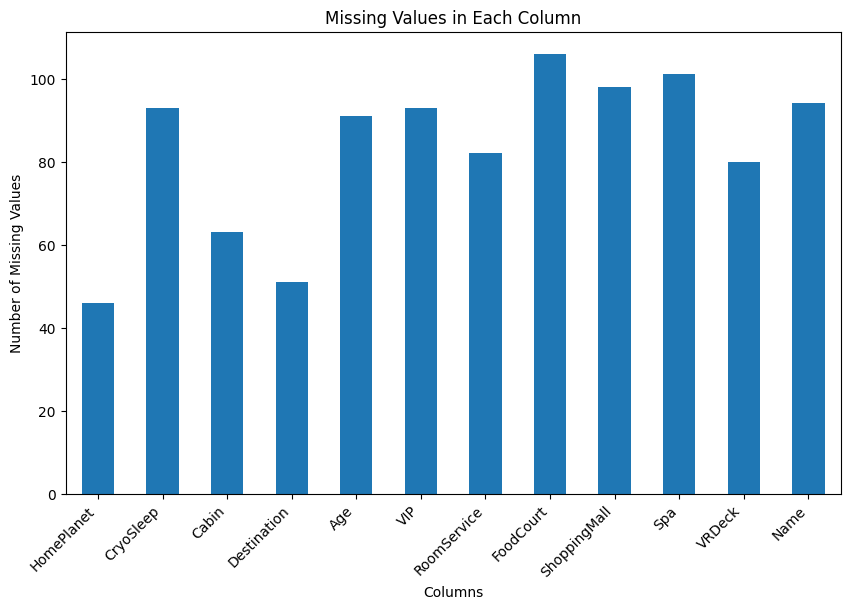

In [25]:
missing_values = test.isnull().sum()
missing_values = missing_values[missing_values > 0]
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar')
plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45, ha="right")
plt.show()

In [26]:
test_copy = test.copy()

In [27]:
test_copy.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Group,_
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0013,01
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,0018,01
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0019,01
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,0021,01
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,0023,01


In [28]:
train_copy = train.copy()

In [29]:
train_copy.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,_
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01


In [30]:
test_copy.drop(['Group', '_'], axis=1, inplace=True, errors='ignore')

In [31]:
test_copy.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [32]:
train_copy.drop(['Group', '_'], axis=1, inplace=True, errors='ignore')
train_copy.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [33]:
train_copy['DataType'] = 'train'
test_copy['DataType'] = 'test'

# Combine the datasets
combined = pd.concat([train_copy, test_copy], ignore_index=True)

# Preprocess the 'Cabin' column by splitting it and then dropping the 'Num' column
combined[['Deck', 'Num', 'Side']] = combined['Cabin'].str.split('/', expand=True)
#combined.drop('Num', axis=1, inplace=True)

# Display the modified combined DataFrame structure to verify changes
combined.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,DataType,Deck,Num,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,train,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,train,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,train,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,train,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,train,F,1,S


In [34]:
unique_values_counts = {col: combined[col].nunique() for col in combined.columns}
for col in combined.columns:
    num_unique_values = combined[col].nunique(dropna=False)
    print(f"Number of unique values in '{col}':", num_unique_values)

Number of unique values in 'PassengerId': 12970
Number of unique values in 'HomePlanet': 4
Number of unique values in 'CryoSleep': 3
Number of unique values in 'Cabin': 9826
Number of unique values in 'Destination': 4
Number of unique values in 'Age': 81
Number of unique values in 'VIP': 3
Number of unique values in 'RoomService': 1579
Number of unique values in 'FoodCourt': 1954
Number of unique values in 'ShoppingMall': 1368
Number of unique values in 'Spa': 1680
Number of unique values in 'VRDeck': 1643
Number of unique values in 'Name': 12630
Number of unique values in 'Transported': 3
Number of unique values in 'DataType': 2
Number of unique values in 'Deck': 9
Number of unique values in 'Num': 1895
Number of unique values in 'Side': 3


In [35]:
combined.drop('Cabin', axis=1, inplace=True)
# Display the modified combined DataFrame structure to verify changes
combined.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,DataType,Deck,Num,Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,train,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,train,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,train,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,train,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,train,F,1,S


<ipython-input-38-1416a4118e58>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = combind_copy.corr()


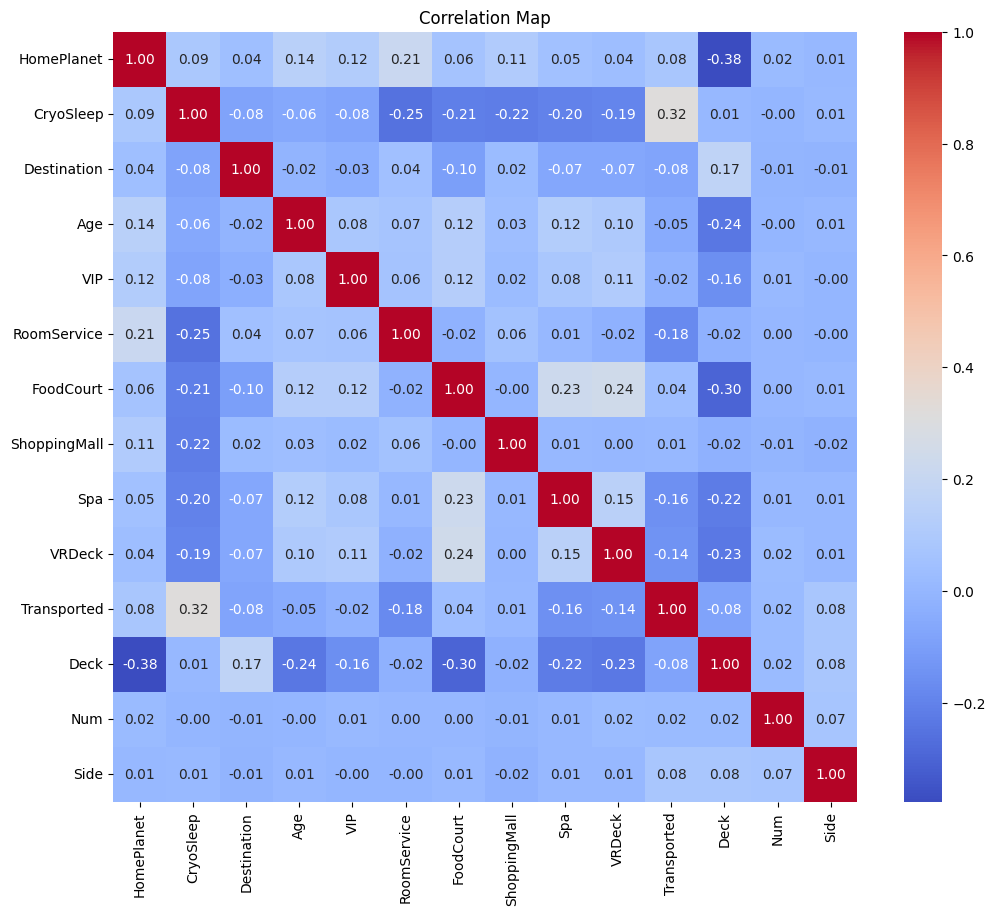

In [38]:
combind_copy = combined.copy()
bool_columns = ['CryoSleep', 'VIP', 'Transported']
for col in bool_columns:
    combind_copy[col] = combind_copy[col].fillna(0).astype(int)

# Convert categorical columns to numerical values using Label Encoding
categorical_columns = ['HomePlanet', 'Destination', 'Deck', 'Num', 'Side']
for col in categorical_columns:
    combind_copy[col] = combind_copy[col].astype('category').cat.codes

# Calculate the correlation matrix
corr = combind_copy.corr()

# Generate a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Map')
plt.show()

In [39]:
# Convert 'VIP' and 'CryoSleep' boolean columns to integers, keeping NaN values unchanged
combined['VIP'] = combined['VIP'].astype(float)
combined['CryoSleep'] = combined['CryoSleep'].astype(float)


# Encode 'Deck' and 'Side' using a LabelEncoder or custom mapping
deck_encoder = LabelEncoder()
side_encoder = LabelEncoder()

# Fit and transform 'Deck' and 'Side' to integers
combined['Deck'] = deck_encoder.fit_transform(combined['Deck'])
combined['Side'] = side_encoder.fit_transform(combined['Side'])

# Select columns for MICE imputation
columns_to_impute = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall','Num', 'Spa', 'VRDeck', 'Deck', 'Side', 'VIP', 'CryoSleep']

# Instantiate the MICE imputer
mice_imputer = IterativeImputer(max_iter=10, random_state=0)

# Perform the imputation
combined[columns_to_impute] = mice_imputer.fit_transform(combined[columns_to_impute])


In [40]:
combined.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,DataType,Deck,Num,Side
0,0001_01,Europa,0.0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,train,1.0,0.0,0.0
1,0002_01,Earth,0.0,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,train,5.0,0.0,1.0
2,0003_01,Europa,0.0,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,train,0.0,0.0,1.0
3,0003_02,Europa,0.0,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,train,0.0,0.0,1.0
4,0004_01,Earth,0.0,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,train,5.0,1.0,1.0


In [41]:
combined.isnull().sum()

PassengerId        0
HomePlanet       157
CryoSleep          0
Destination      154
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Name             294
Transported     4277
DataType           0
Deck               0
Num                0
Side               0
dtype: int64

In [42]:
def predict_missing_values(df, column, features_columns):
    """
    Predicts missing values for a specified column in a DataFrame using RandomForestClassifier.

    Parameters:
    - df: pandas DataFrame containing the data.
    - column: String, the name of the column for which to predict missing values.
    - features_columns: List of strings, the names of the columns to use as features for the prediction.

    The function updates the DataFrame in place by filling in the missing values in the specified column.
    """

    # Split the data into two subsets: one where the target column has known values and one where it is missing
    known_values = df[df[column].notna()]
    unknown_values = df[df[column].isna()]

    # Prepare the feature matrices (X) and target vector (y) for the model
    X = known_values[features_columns]
    y = known_values[column]

    # Since the target variable is categorical, encoding it to numerical format
    encoder = LabelEncoder()
    y_encoded = encoder.fit_transform(y)

    # Split the dataset with known values into training and test sets for model evaluation
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

    # Initialize and train the RandomForestClassifier
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    print(f"Accuracy on test set for {column}: {accuracy_score(y_test, y_pred)}")

    # Use the trained model to predict the missing values using the feature matrix from the unknown values subset
    X_unknown = unknown_values[features_columns]
    predicted_values_encoded = model.predict(X_unknown)

    # Decode the predicted numerical labels back to the original categorical values
    predicted_values = encoder.inverse_transform(predicted_values_encoded)

    # Fill in the missing values in the original DataFrame with the predicted values
    df.loc[df[column].isna(), column] = predicted_values

# Specify the features to use for the predictions
features_columns = ['Age', 'VIP', 'CryoSleep', 'Deck', 'Side']

# Predict missing 'HomePlanet' values
predict_missing_values(combined, 'HomePlanet', features_columns)

# Predict missing 'Destination' values
predict_missing_values(combined, 'Destination', features_columns)


Accuracy on test set for HomePlanet: 0.8560280920795942
Accuracy on test set for Destination: 0.6684867394695788


In [43]:
# Separate the combined dataset back into the original train and test datasets
train_processed = combined[combined['DataType'] == 'train'].drop('DataType', axis=1)
test_processed = combined[combined['DataType'] == 'test'].drop('DataType', axis=1)


In [44]:
train_processed.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
0,0001_01,Europa,0.0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1.0,0.0,0.0
1,0002_01,Earth,0.0,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,5.0,0.0,1.0
2,0003_01,Europa,0.0,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0.0,0.0,1.0
3,0003_02,Europa,0.0,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0.0,0.0,1.0
4,0004_01,Earth,0.0,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,5.0,1.0,1.0


In [45]:
test_processed.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
8693,0013_01,Earth,1.0,TRAPPIST-1e,27.0,0.0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,NaN,6.0,3.0,1.0
8694,0018_01,Earth,0.0,TRAPPIST-1e,19.0,0.0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,NaN,5.0,4.0,1.0
8695,0019_01,Europa,1.0,55 Cancri e,31.0,0.0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,NaN,2.0,0.0,1.0
8696,0021_01,Europa,0.0,TRAPPIST-1e,38.0,0.0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,NaN,2.0,1.0,1.0
8697,0023_01,Earth,0.0,TRAPPIST-1e,20.0,0.0,10.0,0.0,635.0,0.0,0.0,Brence Harperez,NaN,5.0,5.0,1.0


In [46]:
train_processed.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
Deck              0
Num               0
Side              0
dtype: int64

In [47]:
# Apply one-hot encoding to 'HomePlanet' and 'Destination' for both datasets
train_final_encoded = pd.get_dummies(train_processed, columns=['HomePlanet', 'Destination'])
test_final_encoded = pd.get_dummies(test_processed, columns=['HomePlanet', 'Destination'])


In [48]:
train_final_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8693 entries, 0 to 8692
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                8693 non-null   object 
 1   CryoSleep                  8693 non-null   float64
 2   Age                        8693 non-null   float64
 3   VIP                        8693 non-null   float64
 4   RoomService                8693 non-null   float64
 5   FoodCourt                  8693 non-null   float64
 6   ShoppingMall               8693 non-null   float64
 7   Spa                        8693 non-null   float64
 8   VRDeck                     8693 non-null   float64
 9   Name                       8493 non-null   object 
 10  Transported                8693 non-null   object 
 11  Deck                       8693 non-null   float64
 12  Num                        8693 non-null   float64
 13  Side                       8693 non-null   float

In [49]:
train_final_encoded.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0001_01,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1.0,0.0,0.0,0,1,0,0,0,1
1,0002_01,0.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,5.0,0.0,1.0,1,0,0,0,0,1
2,0003_01,0.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0.0,0.0,1.0,0,1,0,0,0,1
3,0003_02,0.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0.0,0.0,1.0,0,1,0,0,0,1
4,0004_01,0.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,5.0,1.0,1.0,1,0,0,0,0,1


In [50]:
def convert_bool(col):
    if col is True:
        return 1
    else:
        return 0

In [51]:
train_final_encoded['Expenses'] = train_final_encoded[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
train_final_encoded.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,...,Deck,Num,Side,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Expenses
0,0001_01,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,...,1.0,0.0,0.0,0,1,0,0,0,1,0.0
1,0002_01,0.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,...,5.0,0.0,1.0,1,0,0,0,0,1,736.0
2,0003_01,0.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,...,0.0,0.0,1.0,0,1,0,0,0,1,10383.0
3,0003_02,0.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,...,0.0,0.0,1.0,0,1,0,0,0,1,5176.0
4,0004_01,0.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,...,5.0,1.0,1.0,1,0,0,0,0,1,1091.0


In [52]:
test_final_encoded['Expenses'] = test_final_encoded[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
test_final_encoded.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,...,Deck,Num,Side,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Expenses
8693,0013_01,1.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,...,6.0,3.0,1.0,1,0,0,0,0,1,0.0
8694,0018_01,0.0,19.0,0.0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,...,5.0,4.0,1.0,1,0,0,0,0,1,2832.0
8695,0019_01,1.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,...,2.0,0.0,1.0,0,1,0,1,0,0,0.0
8696,0021_01,0.0,38.0,0.0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,...,2.0,1.0,1.0,0,1,0,0,0,1,7418.0
8697,0023_01,0.0,20.0,0.0,10.0,0.0,635.0,0.0,0.0,Brence Harperez,...,5.0,5.0,1.0,1,0,0,0,0,1,645.0


In [54]:
y_train = train_final_encoded['Transported'].apply(convert_bool)
X_train = train_final_encoded.drop(['PassengerId', 'Name','Transported','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis=1)


In [55]:
X_train.head()

,CryoSleep,Age,VIP,Deck,Num,Side,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Expenses
0,0.0,39.0,0.0,1.0,0.0,0.0,0,1,0,0,0,1,0.0
1,0.0,24.0,0.0,5.0,0.0,1.0,1,0,0,0,0,1,736.0
2,0.0,58.0,1.0,0.0,0.0,1.0,0,1,0,0,0,1,10383.0
3,0.0,33.0,0.0,0.0,0.0,1.0,0,1,0,0,0,1,5176.0
4,0.0,16.0,0.0,5.0,1.0,1.0,1,0,0,0,0,1,1091.0


In [56]:
test_final_encoded.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,...,Deck,Num,Side,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Expenses
8693,0013_01,1.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,...,6.0,3.0,1.0,1,0,0,0,0,1,0.0
8694,0018_01,0.0,19.0,0.0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,...,5.0,4.0,1.0,1,0,0,0,0,1,2832.0
8695,0019_01,1.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,...,2.0,0.0,1.0,0,1,0,1,0,0,0.0
8696,0021_01,0.0,38.0,0.0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,...,2.0,1.0,1.0,0,1,0,0,0,1,7418.0
8697,0023_01,0.0,20.0,0.0,10.0,0.0,635.0,0.0,0.0,Brence Harperez,...,5.0,5.0,1.0,1,0,0,0,0,1,645.0


In [58]:
test_data = test_final_encoded.drop(['PassengerId', 'Name','Transported','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis=1)

In [59]:
test_data.head()

,CryoSleep,Age,VIP,Deck,Num,Side,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Expenses
8693,1.0,27.0,0.0,6.0,3.0,1.0,1,0,0,0,0,1,0.0
8694,0.0,19.0,0.0,5.0,4.0,1.0,1,0,0,0,0,1,2832.0
8695,1.0,31.0,0.0,2.0,0.0,1.0,0,1,0,1,0,0,0.0
8696,0.0,38.0,0.0,2.0,1.0,1.0,0,1,0,0,0,1,7418.0
8697,0.0,20.0,0.0,5.0,5.0,1.0,1,0,0,0,0,1,645.0


In [60]:
sample_submission_df = pd.read_csv('/content/drive/MyDrive/sample_submission.csv')

In [61]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [63]:
test_data = test_final_encoded.drop(['PassengerId', 'Name','Transported','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis=1)
test_data.head()

,CryoSleep,Age,VIP,Deck,Num,Side,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Expenses
8693,1.0,27.0,0.0,6.0,3.0,1.0,1,0,0,0,0,1,0.0
8694,0.0,19.0,0.0,5.0,4.0,1.0,1,0,0,0,0,1,2832.0
8695,1.0,31.0,0.0,2.0,0.0,1.0,0,1,0,1,0,0,0.0
8696,0.0,38.0,0.0,2.0,1.0,1.0,0,1,0,0,0,1,7418.0
8697,0.0,20.0,0.0,5.0,5.0,1.0,1,0,0,0,0,1,645.0


In [64]:
predicted_transported = model.predict(test_data)

In [65]:
predicted_transported

array([1, 0, 1, ..., 1, 0, 0])

In [66]:
predictions = np.where(predicted_transported > 0.5, 1, 0)

In [67]:
predictions

array([1, 0, 1, ..., 1, 0, 0])

In [68]:
# Flatten the predictions array to make it 1-dimensional
predictions_1d = predictions.ravel()

# create the DataFrame using the 1D predictions array
submission_df = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Transported': predictions_1d.astype(bool)
})

comparison_df = sample_submission_df.merge(submission_df, on='PassengerId', suffixes=('_sample', '_predicted'))

# Calculate the accuracy
accuracy = accuracy_score(comparison_df['Transported_sample'], comparison_df['Transported_predicted'])
print(f"Accuracy: {accuracy}")


# Save the submission file
submission_df.to_csv('/content/drive/MyDrive/submission8.csv', index=False)
print(submission_df)

Accuracy: 0.5651157353285012
     PassengerId  Transported
0        0013_01         True
1        0018_01        False
2        0019_01         True
3        0021_01        False
4        0023_01         True
...          ...          ...
4272     9266_02         True
4273     9269_01        False
4274     9271_01         True
4275     9273_01        False
4276     9277_01        False

[4277 rows x 2 columns]


In [69]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_val)


In [71]:
# Define the model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5121 (20.00 KB)
Trainable params: 5121 (20.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [72]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, verbose=1)


Epoch 1/100
174/174 [==============================] - 2s 4ms/step - loss: 0.5774 - accuracy: 0.6949 - val_loss: 0.5158 - val_accuracy: 0.7584
Epoch 2/100
174/174 [==============================] - 1s 3ms/step - loss: 0.5319 - accuracy: 0.7318 - val_loss: 0.5073 - val_accuracy: 0.7606
Epoch 3/100
174/174 [==============================] - 0s 3ms/step - loss: 0.5237 - accuracy: 0.7313 - val_loss: 0.5073 - val_accuracy: 0.7628
Epoch 4/100
174/174 [==============================] - 0s 3ms/step - loss: 0.5197 - accuracy: 0.7313 - val_loss: 0.4984 - val_accuracy: 0.7664
Epoch 5/100
174/174 [==============================] - 0s 3ms/step - loss: 0.5141 - accuracy: 0.7347 - val_loss: 0.5000 - val_accuracy: 0.7592
Epoch 6/100
174/174 [==============================] - 0s 2ms/step - loss: 0.5098 - accuracy: 0.7392 - val_loss: 0.5019 - val_accuracy: 0.7592
Epoch 7/100
174/174 [==============================] - 1s 5ms/step - loss: 0.5098 - accuracy: 0.7413 - val_loss: 0.4968 - val_accuracy: 0.7613

In [73]:
test_data = scaler.fit_transform(test_data)
predicted_transported = model.predict(test_data)
predictions = np.where(predicted_transported > 0.5, 1, 0)

134/134 [==============================] - 0s 1ms/step


In [74]:
# Flatten the predictions array to make it 1-dimensional
predictions_1d = predictions.ravel()

# create the DataFrame using the 1D predictions array
submission_df = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Transported': predictions_1d.astype(bool)
})

comparison_df = sample_submission_df.merge(submission_df, on='PassengerId', suffixes=('_sample', '_predicted'))

# Calculate the accuracy
accuracy = accuracy_score(comparison_df['Transported_sample'], comparison_df['Transported_predicted'])
print(f"Accuracy: {accuracy}")


Accuracy: 0.5330839373392565


In [75]:
submission_df.to_csv('/content/drive/MyDrive/submission9.csv', index=False)
print(submission_df)

     PassengerId  Transported
0        0013_01         True
1        0018_01        False
2        0019_01         True
3        0021_01         True
4        0023_01        False
...          ...          ...
4272     9266_02         True
4273     9269_01        False
4274     9271_01         True
4275     9273_01        False
4276     9277_01        False

[4277 rows x 2 columns]
